In [113]:
# pip install seaborn
#!/usr/bin/env python

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [115]:
Path_to_data = "../data/AdSmartABdata.csv"
#Read data from csv file
db = pd.read_csv(Path_to_data, na_values=['?', None], parse_dates=['date'])

#Display sample of the data
db.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
1595,34da343c-b2cf-452a-a12d-ea3475b4b426,control,2020-07-03,15,Pixel 3,6,Facebook,1,0
7063,e05daa86-33b5-4607-8168-8c6f475d8cbf,exposed,2020-07-09,5,Generic Smartphone,6,Chrome Mobile,0,0
2111,45785b95-514a-4fa8-a094-81df687e3a7d,exposed,2020-07-09,12,Generic Smartphone,6,Chrome Mobile,0,0
6237,c64b207a-b6ae-495c-b974-7a98aa56c66e,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
1862,3d8f2180-0787-40a7-9566-62d16f672882,exposed,2020-07-09,4,Samsung SM-G975F,6,Chrome Mobile WebView,0,1
3519,71e73f63-0507-4adc-8d98-ccc649da5dd6,control,2020-07-07,7,Samsung SM-G950F,6,Samsung Internet,0,0
487,0e919263-c49f-4a57-a6a3-a1ebe06fc184,control,2020-07-08,22,Generic Smartphone,6,Chrome Mobile,0,0
6578,d0817bc0-fd19-4408-b0fa-767629ae8191,exposed,2020-07-09,3,Generic Smartphone,6,Chrome Mobile,0,0
6414,cb85a2b6-84f0-46e3-8f36-43eacc69df74,control,2020-07-05,17,Samsung SM-A202F,6,Samsung Internet,0,0
3207,67c5a2cf-3a70-4247-a486-bde927a68ae4,control,2020-07-08,18,Samsung SM-G960F,6,Samsung Internet,0,0


In [116]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

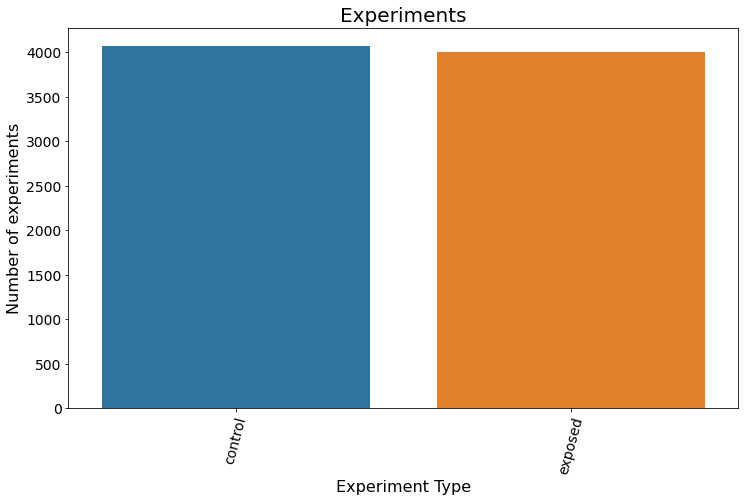

In [117]:
experiments = db[["experiment"]].groupby('experiment').agg({'experiment':'count'}).rename(columns = {'experiment' : 'count'}).reset_index()
experiments = experiments.sort_values(by="count", ascending=False)
plot_bar(experiments, 'experiment', 'count', 'Experiments', 'Experiment Type', 'Number of experiments')

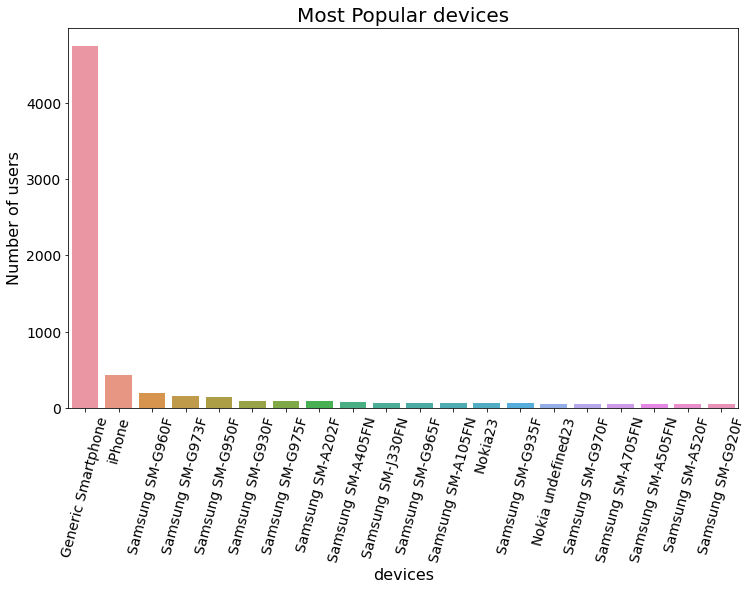

In [118]:
handsets = db[["device_make"]].groupby('device_make').agg({'device_make':'count'}).rename(columns = {'device_make' : 'count'}).sort_values(by="count", ascending=False).head(20).reset_index()
handsets.head()
plot_bar(handsets, 'device_make', 'count', 'Most Popular devices', 'devices', 'Number of users')

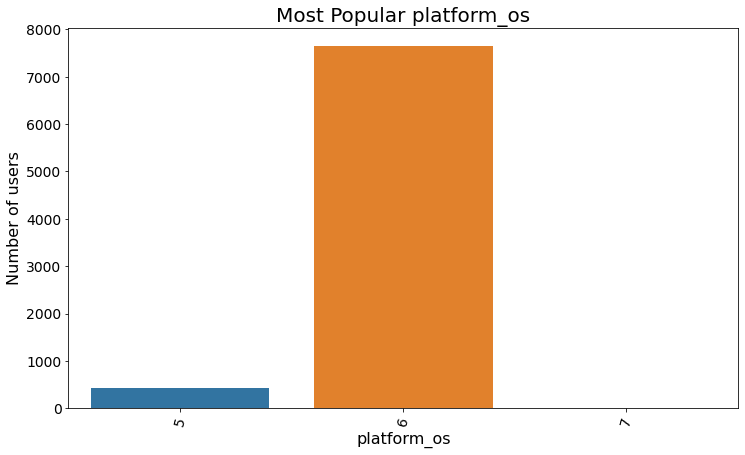

In [119]:
OS = db[["platform_os"]].groupby('platform_os').agg({'platform_os':'count'}).rename(columns = {'platform_os' : 'count'}).reset_index()
OS.head()
plot_bar(OS, 'platform_os', 'count', 'Most Popular platform_os', 'platform_os', 'Number of users')


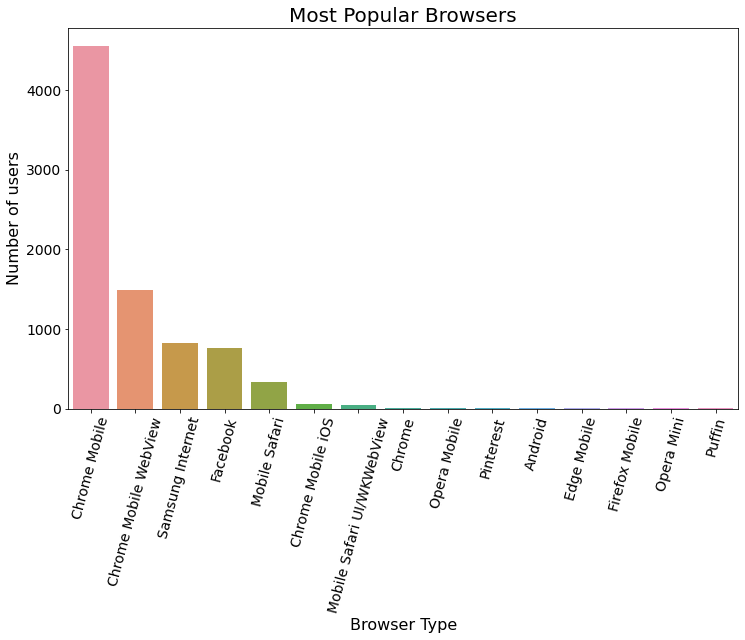

In [120]:
browser = db[["browser"]].groupby('browser').agg({'browser':'count'}).rename(columns = {'browser' : 'count'}).reset_index()
browser = browser.sort_values(by="count", ascending=False).head(20)
plot_bar(browser, 'browser', 'count', 'Most Popular Browsers', 'Browser Type', 'Number of users')


In [121]:
db['clicked'] = db['yes'] + db['no']
db.describe()

,hour,platform_os,yes,no,clicked
count,8077.000000,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075,0.153894
std,5.734879,0.224333,0.256537,0.276013,0.360869
min,0.000000,5.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000,1.000000


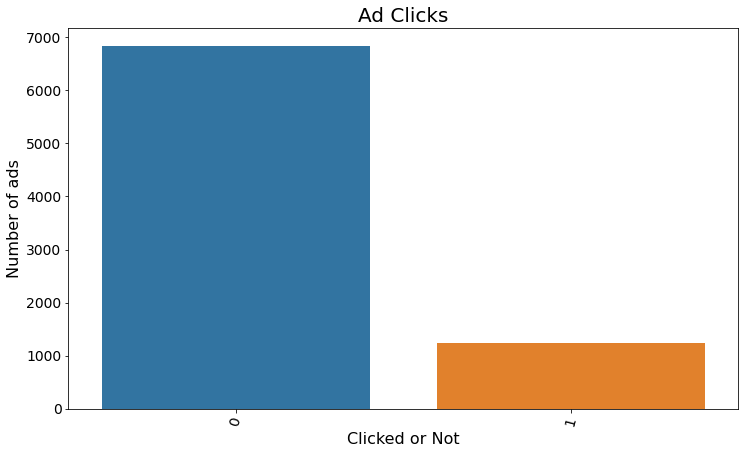

In [122]:
clicks = db[["clicked"]].groupby('clicked').agg({'clicked':'count'}).rename(columns = {'clicked' : 'count'}).reset_index()
clicks = clicks.sort_values(by="count", ascending=False)
plot_bar(clicks, 'clicked', 'count', 'Ad Clicks', 'Clicked or Not', 'Number of ads')

In [123]:
clicked_ad = db[db['clicked'] == 1]
clicked_ad.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


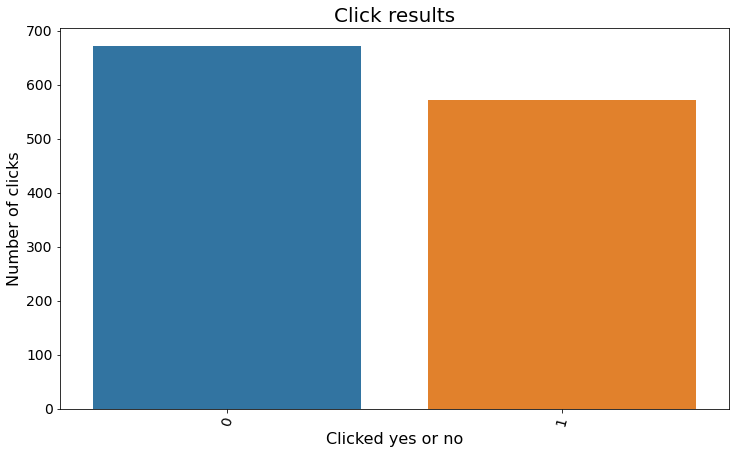

In [124]:
clicked = clicked_ad[["yes"]].groupby('yes').agg({'yes':'count'}).rename(columns = {'yes' : 'count'}).reset_index()
clicked = clicked.sort_values(by="count", ascending=False)
plot_bar(clicked, 'yes', 'count', 'Click results', 'Clicked yes or no', 'Number of clicks')

In [125]:
import math
import scipy

# **CLASSICAL A/B TESTING**

In [126]:
exposed = db[db['clicked'] == 1][db['experiment'] == 'exposed']
control = db[db['clicked'] == 1][db['experiment'] == 'control']
exposed.sample(5)

/tmp/ipykernel_6002/3235957727.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exposed = db[db['clicked'] == 1][db['experiment'] == 'exposed']
/tmp/ipykernel_6002/3235957727.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control = db[db['clicked'] == 1][db['experiment'] == 'control']


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
4841,9a685f5c-8764-48cb-9b43-a3f91249a208,exposed,2020-07-07,20,Generic Smartphone,6,Chrome Mobile,1,0,1
6448,cca8a3c4-a143-4236-8aa0-bb8c1c218155,exposed,2020-07-06,5,Samsung SM-J330FN,6,Samsung Internet,0,1,1
7421,eab088f9-0e83-4b76-a67d-08c7d633cfb5,exposed,2020-07-06,8,Pixel 3a,6,Chrome Mobile WebView,1,0,1
5854,b959842f-de5a-43c2-8d15-4b0d5a7914b7,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,1,0,1
1057,225c2ca4-a64e-4daa-9373-cd2766e620ee,exposed,2020-07-09,8,Generic Smartphone,6,Chrome Mobile,1,0,1


In [127]:
control.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1
5363,a9a0aa88-f2bf-44a5-8d33-2c77e56f559a,control,2020-07-05,5,Generic Smartphone,6,Chrome Mobile,1,0,1
2361,4d6160f2-dfb2-4754-9caa-6ad2be66f043,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1
201,05ff30c6-4265-4a1d-80de-537563f7470d,control,2020-07-08,18,Generic Smartphone,6,Chrome Mobile,1,0,1
6220,c5b454de-4966-4153-9abe-f28808e6042b,control,2020-07-10,3,Generic Smartphone,6,Chrome Mobile,0,1,1


In [128]:
len(exposed),len(control)

(657, 586)

In [129]:

conversion_rates = db.groupby('experiment')['yes']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: scipy.stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
experiment,,,
control,0.065,0.246,0.004
exposed,0.077,0.266,0.004


In [130]:
conversion_rates = db.groupby('experiment')['no']

std_p = lambda x: np.std(x, ddof=0)              # Std. deviation of the proportion
se_p = lambda x: scipy.stats.sem(x, ddof=0)            # Std. error of the proportion (std / sqrt(n))

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')



,conversion_rate,std_deviation,std_error
experiment,,,
control,0.079,0.270,0.004
exposed,0.087,0.282,0.004


# Conversion in control and exposed groups

## YES

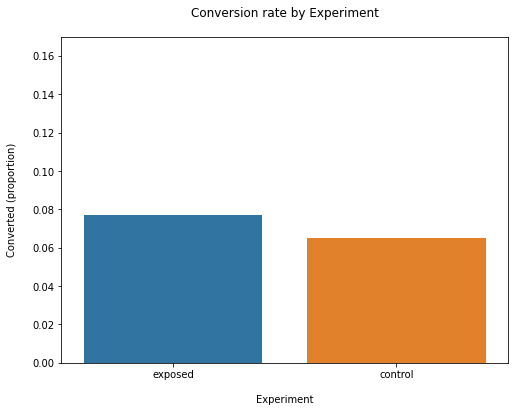

In [131]:
plt.figure(figsize=(8,6))

sns.barplot(x=db['experiment'], y=db['yes'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

## NO

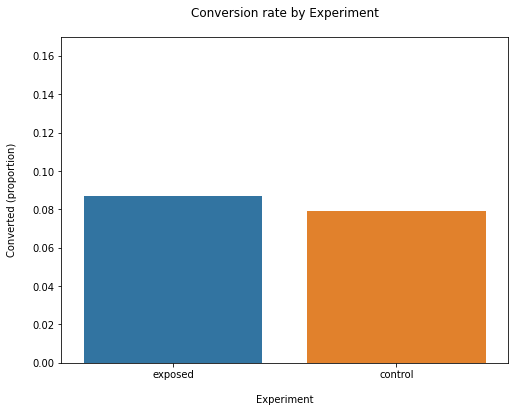

In [132]:
plt.figure(figsize=(8,6))

sns.barplot(x=db['experiment'], y=db['no'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by Experiment', pad=20)
plt.xlabel('Experiment', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);



In [133]:
!pip install statsmodels
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [134]:
db_yes = db[db['yes'] == 1]
db_yes = db_yes.drop('no', axis = 1)
db_yes = db_yes.rename(columns={"yes": "brand_awareness"})
db_yes.head()


,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,clicked
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,1


In [135]:
db_no = db[db['no'] == 1]
db_no = db_no.drop('yes', axis = 1)
da = {1 : 0}
db_no = db_no.replace({'no':da})
db_no = db_no.rename(columns={"no": "brand_awareness"})

db_no.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,clicked
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1


In [136]:
db_clean = pd.concat([db_yes, db_no], axis = 0)
db_clean.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,clicked
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1,1


In [137]:
db_clean = db_clean.sample(frac=1).reset_index(drop=True)

ab_summary = db_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = db_clean.pivot_table(values='brand_awareness', index='experiment', aggfunc=lambda x: len(x))
ab_summary['rate'] = db_clean.pivot_table(values='brand_awareness', index='experiment')
ab_summary.head()

,brand_awareness,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


Text(0, 0.5, 'probability')

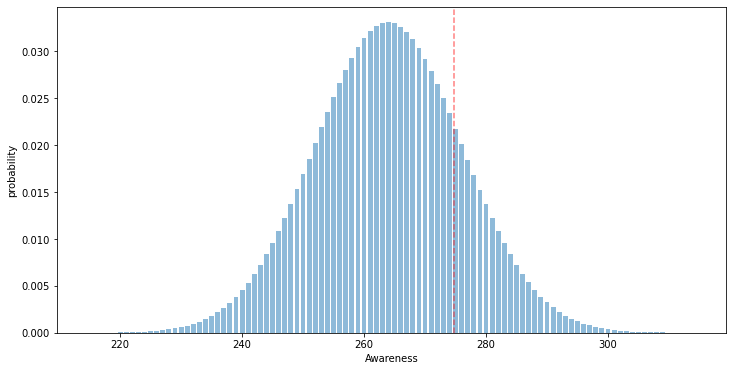

In [138]:
control_aware = ab_summary.brand_awareness[0] #A_converted
control_total = ab_summary.total[0] #A_total

control_rate = ab_summary.rate[0]
exposed_rate = ab_summary.rate[1]

exposed_aware = ab_summary.brand_awareness[1] #B_converted
exposed_total = ab_summary.total[1] #B_total

fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(control_aware-49, control_aware+50, 100)
y = scipy.stats.binom(control_total, control_rate).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=exposed_rate * control_total, c='red', alpha=0.5, linestyle='--')
plt.xlabel('Awareness')
plt.ylabel('probability')

The probability

The distribution for the control group is shown in red and the result from the exposed group is indicated by the red dashed line.It indicates that the probability of getting the result from the control group is somehow high.


Text(0, 0.5, 'probability')

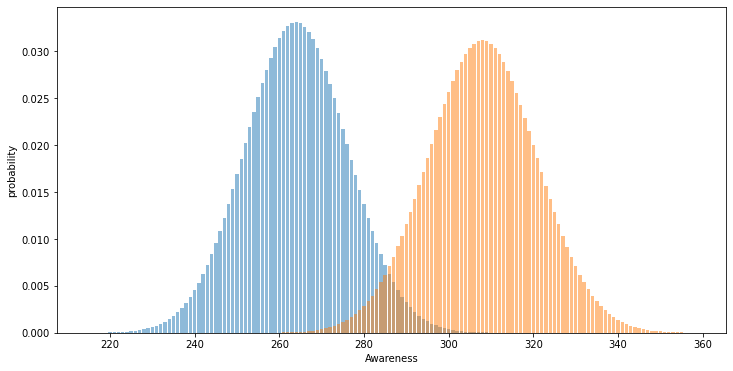

In [139]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(control_aware-49, control_aware+50, 100)
yA = scipy.stats.binom(control_total, control_rate).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(exposed_aware-49, exposed_aware+50, 100)
yB = scipy.stats.binom(exposed_total, exposed_rate).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('Awareness')
plt.ylabel('probability')

In [140]:
class ClassicalTest:
    def __init__(self, exposed, control, sample_size):
        self.exposed = np.array(exposed.sample(sample_size)['yes'])
        self.control = np.array(control.sample(sample_size)['yes'])
        self.sample_size = sample_size
        
    def z_value(self):
        e_mean = np.mean(self.exposed)
        c_mean = np.mean(self.control)
        #print("exposed mean:", e_mean, "control mean:", c_mean)
        z = (e_mean - c_mean)/(c_mean*(1-c_mean)/self.sample_size)**0.5
        return z


In [141]:
test = ClassicalTest(exposed,control, 550)
print("z-value:", test.z_value())
print("p-value:", scipy.stats.norm.sf(test.z_value()))

z-value: 0.7718261858112738
p-value: 0.2201086901467551


# CONCLUSION



Are the number of data points in the experiment enough to make a reasonable judgement or should the company run a longer experiment? Remember that running the experiment longer may be costly for many reasons, so you should always optimize the number of samples to make a statistically sound decision.

What does your A/B testing analysis tell you? Is brand awareness increased for the exposed group?

## SEQUENTIAL TESTING

In [142]:
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)

# Use the next class structure to complete your sequential testing

In [143]:
## your code here. include other necessary functions as you want.
import random
class SequentialTest:
    def __init__(self,exposed,control,sample_size):
        self.exposed = exposed
        self.control = control
        self.sample_size = sample_size
        
        '''
        initialise startup variables
        '''

    def stoppingRule(self, T, C):
        '''
        This function should take current observation and return statistical decision made. 
        Consider truncate rule for longer tests
        '''
        if T - C > 2*(self.sample_size)**0.5 :
            return (1, "Exposed group produced a statistically significant increase.")
        elif T + C > self.sample_size:
            return (2, "Their is no statistically significant difference between two test groups")
        else: return (0, 'more samples needed')
    
    def perform_test(self):
        random.shuffle(self.exposed)
        random.shuffle(self.control)
        self.T, self.C = 0, 0
        for i in range(self.sample_size):
            self.T += self.exposed[i]
            self.C += self.control[i]
            j, message = self.stoppingRule(self.T, self.C)
            if j == 1 or j == 2:
                return message
        return 'sample size too small'
        
    def computeBoundaries(self,):
        '''
        This function shoud compute boundaries 
        '''

    def plotTest(self,):
        '''
        showing the cumulative statistical test (e.g., log probability ratio) and the uper and lower limits.
        '''

    def plotBoundaries(self,):
        '''cumulative sums of exposed successes, bounded by the critical limits.
        '''



In [144]:
def transform_data(df, sample_size):
    '''
    segment data into exposed and control groups
    consider that SmartAd runs the experment hourly, group data into hours. 
      Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
    create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), 
    the method generates random binomial distribution
        #Example
           engagement = np.array([5, 3, 3])
           yes = np.array([2, 0, 3])       
         Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
         of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
         the last 3 are ones where position the ones is randomly distributed within each group.
    '''
    exposed = df[df['clicked'] == 1][df['experiment'] == 'exposed']
    control = df[df['clicked'] == 1][df['experiment'] == 'control']
    exposed = np.array(exposed.sample(sample_size)['yes'])
    control = np.array(control.sample(sample_size)['yes'])
    return exposed,control

def plotDataSummary(exposed, control):
    fig, axs = plt.subplots(1,2,figsize=(16,4))
    fig.suptitle('Yes-no distribution per group')
    sns.countplot(x = 'yes', data=pd.DataFrame({'yes' : exposed}),ax=axs[0]).set_title('Exposed Group')
    sns.countplot(x = 'yes', data=pd.DataFrame({'yes' : control}),ax=axs[1]).set_title('Control Group')
    
def pretyPrintTestResult(test):
    '''This function print final test result. Json format is recommended. For example'''
    message = test.perform_test()
    res = {
    "name": "Sequential AB Testing",
    "engagementCountControl": len(test.control),
    "engagementCountExposed": len(test.exposed),
    "positiveCountControl": test.C,
    "positiveCountExposed": test.T,
    "TotalObservation": message
    }
    return res

/tmp/ipykernel_6002/4052710726.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exposed = df[df['clicked'] == 1][df['experiment'] == 'exposed']
/tmp/ipykernel_6002/4052710726.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control = df[df['clicked'] == 1][df['experiment'] == 'control']


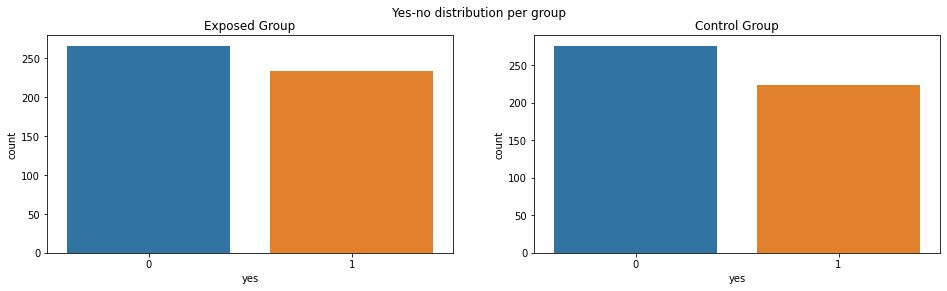

In [145]:

######################################
# 'Define statistical parameters such as alpha, beta, sample size if evan approach is used, odd ratio for SPRT'

sample_size = 500

##data processing here
exposed, control = transform_data(db, sample_size)

##plot data summary
plotDataSummary(exposed,control)


In [146]:
test=SequentialTest(exposed, control, sample_size)

'Print test result.'
pretyPrintTestResult(test)

{'name': 'Sequential AB Testing',
 'engagementCountControl': 500,
 'engagementCountExposed': 500,
 'positiveCountControl': 224,
 'positiveCountExposed': 234,
 'TotalObservation': 'sample size too small'}

# **TASK 2.2**

# Cleaning Data and Versioning

In [147]:
db_clean.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,clicked
0,b4ab0db4-a7bf-45ad-8bd0-787c641b07b1,exposed,2020-07-08,19,Generic Smartphone,6,Chrome Mobile,0,1
1,b0abe47c-5cf7-4b86-9843-42a69312da09,exposed,2020-07-09,17,Samsung SM-A405FN,6,Samsung Internet,0,1
2,06cf1733-06d1-4c7c-a429-2312177166a2,exposed,2020-07-09,20,Samsung SM-G950F,6,Samsung Internet,0,1
3,0e98b506-4832-4988-9775-2d6f8bc49114,control,2020-07-03,15,Samsung SM-G960F,6,Samsung Internet,1,1
4,422f1a84-afd8-48b1-af6e-0bea20fefe02,exposed,2020-07-09,8,Generic Smartphone,6,Chrome Mobile,0,1


Resetting Index

In [148]:
df = db_clean.copy()
df.reset_index(drop=True, inplace=True)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,brand_awareness,clicked
0,b4ab0db4-a7bf-45ad-8bd0-787c641b07b1,exposed,2020-07-08,19,Generic Smartphone,6,Chrome Mobile,0,1
1,b0abe47c-5cf7-4b86-9843-42a69312da09,exposed,2020-07-09,17,Samsung SM-A405FN,6,Samsung Internet,0,1
2,06cf1733-06d1-4c7c-a429-2312177166a2,exposed,2020-07-09,20,Samsung SM-G950F,6,Samsung Internet,0,1
3,0e98b506-4832-4988-9775-2d6f8bc49114,control,2020-07-03,15,Samsung SM-G960F,6,Samsung Internet,1,1
4,422f1a84-afd8-48b1-af6e-0bea20fefe02,exposed,2020-07-09,8,Generic Smartphone,6,Chrome Mobile,0,1


# Splitting the Data to two versions

In [149]:
df_browser = df.drop('platform_os', axis = 1)
df_platform = df.drop('browser', axis = 1)


In [150]:
#df_browser.to_csv('AdSmartV1.csv')
#df_platform.to_csv('AdSmartV2.csv')

Environment

In [151]:
pip install xgboost sklearn

Note: you may need to restart the kernel to use updated packages.


In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz



In [153]:
experiment = {'exposed':1, 'control':0}
df_browser = df_browser.replace({'experiment':experiment})

df_v1 = df_browser.drop(['device_make'], axis = 1)

df_v1.head()

,auction_id,experiment,date,hour,browser,brand_awareness,clicked
0,b4ab0db4-a7bf-45ad-8bd0-787c641b07b1,1,2020-07-08,19,Chrome Mobile,0,1
1,b0abe47c-5cf7-4b86-9843-42a69312da09,1,2020-07-09,17,Samsung Internet,0,1
2,06cf1733-06d1-4c7c-a429-2312177166a2,1,2020-07-09,20,Samsung Internet,0,1
3,0e98b506-4832-4988-9775-2d6f8bc49114,0,2020-07-03,15,Samsung Internet,1,1
4,422f1a84-afd8-48b1-af6e-0bea20fefe02,1,2020-07-09,8,Chrome Mobile,0,1


In [154]:
encoder = OneHotEncoder()
encode = encoder.fit_transform(df_v1[["browser"]])

encoded = encode.toarray()

new_encoded = np.sum(encoded, axis = 1, dtype = int)

df_v1.head()

,auction_id,experiment,date,hour,browser,brand_awareness,clicked
0,b4ab0db4-a7bf-45ad-8bd0-787c641b07b1,1,2020-07-08,19,Chrome Mobile,0,1
1,b0abe47c-5cf7-4b86-9843-42a69312da09,1,2020-07-09,17,Samsung Internet,0,1
2,06cf1733-06d1-4c7c-a429-2312177166a2,1,2020-07-09,20,Samsung Internet,0,1
3,0e98b506-4832-4988-9775-2d6f8bc49114,0,2020-07-03,15,Samsung Internet,1,1
4,422f1a84-afd8-48b1-af6e-0bea20fefe02,1,2020-07-09,8,Chrome Mobile,0,1


In [155]:
train_browser, test_browser, validate_browser  = \
              np.split(df_browser[df_browser.columns[1:]].sample(frac=1, random_state=42), 
                       [int(.7*len(df_browser)), int(.9*len(df_browser))])

In [156]:
browser_X_col = df_browser.columns[1:-1]

browser_train =  train_browser[browser_X_col]
browser_train_labels = train_browser['brand_awareness']

browser_test =  test_browser[browser_X_col]
browser_test_labels = test_browser['brand_awareness']

browser_val =  validate_browser[browser_X_col]
browser_val_labels = validate_browser['brand_awareness']

In [157]:
numerical_browser = ['date','hour', 'experiment']
cat_browser = ['device_make', 'browser']

In [158]:
class ExtractDay(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass
    def fit(self, X, y=None):
        return self               
    
    def transform(self, X, y=None):
        X= X.copy()
        X['date'] = X['date'].apply(lambda x:x.weekday())
        return X

In [159]:
num_pipeline = Pipeline([
    ('day_extractor', ExtractDay()),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_browser),
    ('cat', OneHotEncoder(), numerical_browser)
])

In [160]:
browser_train_processed = full_pipeline.fit_transform(browser_train)
browser_test_processed = full_pipeline.fit_transform(browser_test)
browser_val_processed = full_pipeline.fit_transform(browser_val)

In [161]:
params ={'objective':'binary:logistic', 'learning_rate':0.1, 'max_depth':5, 'random_state':42, 'use_label_encoder':False, 'nfold':5}

In [162]:
clf_xgb = xgb.XGBClassifier(base_score=0.5, max_depth=5, learning_rate=0.1, random_state=42, objective='binary:logistic', use_label_encoder=False, nfold=5)

In [163]:
clf_xgb.fit(browser_test_processed, browser_test_labels)

[18:59:49] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nfold=5, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [164]:
y_predicted = clf_xgb.predict(browser_test_processed)

In [165]:
rms = mean_squared_error(browser_test_labels, y_predicted, squared=False)
rms

0.5040161287741853

In [166]:
data_dmatrix = xgb.DMatrix(data=browser_val_processed, label=browser_val_labels)

In [167]:
cv_result = xgb.cv(params=params,dtrain=data_dmatrix, nfold=5, metrics='rmse', stratified=True, as_pandas=True, seed=42)
cv_result

[18:59:50] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:50] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:50] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Plea

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.490049,0.001631,0.498660,0.002837
1,0.481786,0.002248,0.496005,0.004098
2,0.474806,0.003018,0.495755,0.005710
3,0.468990,0.003911,0.496782,0.004063
4,0.463808,0.004668,0.497639,0.004112
5,0.458604,0.004811,0.497810,0.005119
6,0.453866,0.005183,0.498160,0.006551
7,0.449739,0.005431,0.499315,0.008113
8,0.445667,0.005246,0.501103,0.010431
9,0.441707,0.005611,0.502419,0.009794


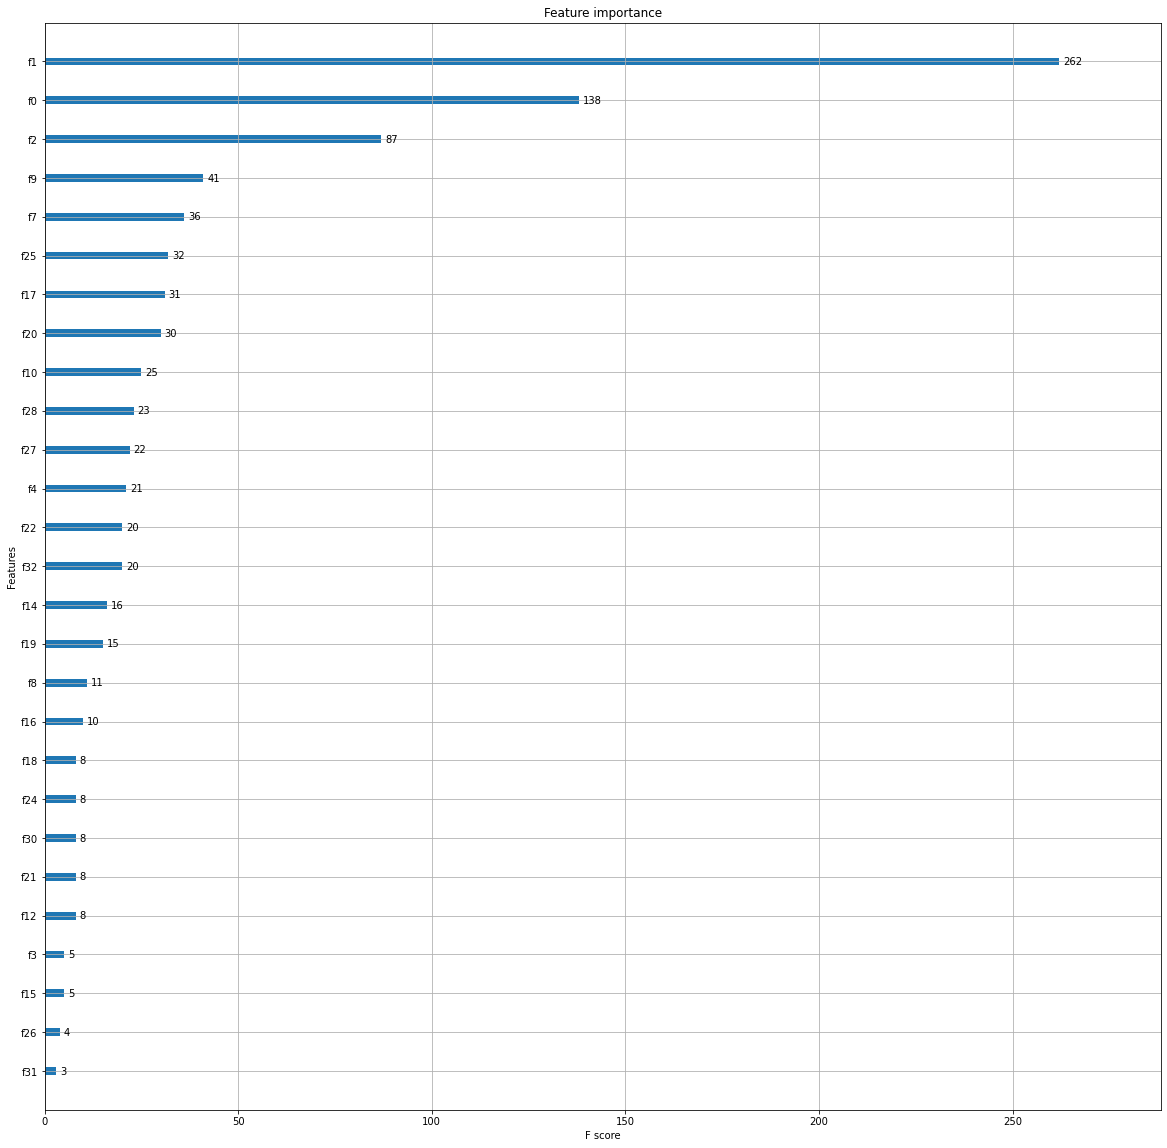

In [168]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [20, 20]

# PLATFORM

In [169]:
experiment = {'exposed':1, 'control':0}
df_platform = df_platform.replace({'experiment':experiment})

In [170]:
train_platform, test_platform, validate_platform  = \
              np.split(df_platform[df_platform.columns[1:]].sample(frac=1, random_state=42), 
                       [int(.7*len(df_platform)), int(.9*len(df_platform))])

In [171]:
platform_X_col = df_platform.columns[1:-1]

platform_train =  train_platform[platform_X_col]
platform_train_labels = train_platform['brand_awareness']

platform_test =  test_platform[platform_X_col]
platform_test_labels = test_platform['brand_awareness']

platform_val =  validate_platform[platform_X_col]
platform_val_labels = validate_platform['brand_awareness']

In [172]:
numerical_platform = ['date','hour', 'experiment']
cat_platform = ['device_make', 'browser']

In [173]:
class ExtractDay(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self               
    
    def transform(self, X, y=None):
        X= X.copy()
        X['date'] = X['date'].apply(lambda x:x.weekday())
        return X

In [174]:
numerical_platform= ['date','hour','platform_os', 'experiment']
cat_platform = ['device_make']

In [175]:
num_pipeline = Pipeline([
    ('day_extractor', ExtractDay()),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, numerical_platform),
    ('cat', OneHotEncoder(), numerical_platform)
])

In [176]:
platform_train_processed = full_pipeline.fit_transform(platform_train)
platform_test_processed = full_pipeline.fit_transform(platform_test)
platform_val_processed = full_pipeline.fit_transform(platform_val)

In [177]:
params ={'objective':'binary:logistic', 'learning_rate':0.1, 'max_depth':5, 'random_state':42, 'use_label_encoder':False, 'nfold':5}

In [178]:
clf_xgb = xgb.XGBClassifier(base_score=0.5, max_depth=5, learning_rate=0.1, random_state=42, objective='binary:logistic', use_label_encoder=False, nfold=5)

In [179]:
clf_xgb.fit(platform_test_processed, platform_test_labels)

[18:59:51] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nfold=5, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [180]:
y_predicted = clf_xgb.predict(platform_test_processed)

In [181]:
rms = mean_squared_error(platform_test_labels, y_predicted, squared=False)
rms

0.5040161287741853

In [182]:
data_dmatrix = xgb.DMatrix(data=platform_val_processed, label=platform_val_labels)

In [183]:
cv_result = xgb.cv(params=params,dtrain=data_dmatrix, nfold=5, metrics='rmse', stratified=True, as_pandas=True, seed=42)
cv_result

[18:59:52] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:52] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:59:52] WARNING: ../src/learner.cc:573: 
Parameters: { "nfold", "use_label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Plea

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.490049,0.001631,0.498660,0.002837
1,0.481786,0.002248,0.496005,0.004098
2,0.474806,0.003018,0.495755,0.005710
3,0.468990,0.003911,0.496782,0.004063
4,0.463808,0.004668,0.497639,0.004112
5,0.458604,0.004811,0.497810,0.005119
6,0.453866,0.005183,0.498160,0.006551
7,0.449739,0.005431,0.499315,0.008113
8,0.445667,0.005246,0.501103,0.010431
9,0.441707,0.005611,0.502419,0.009794


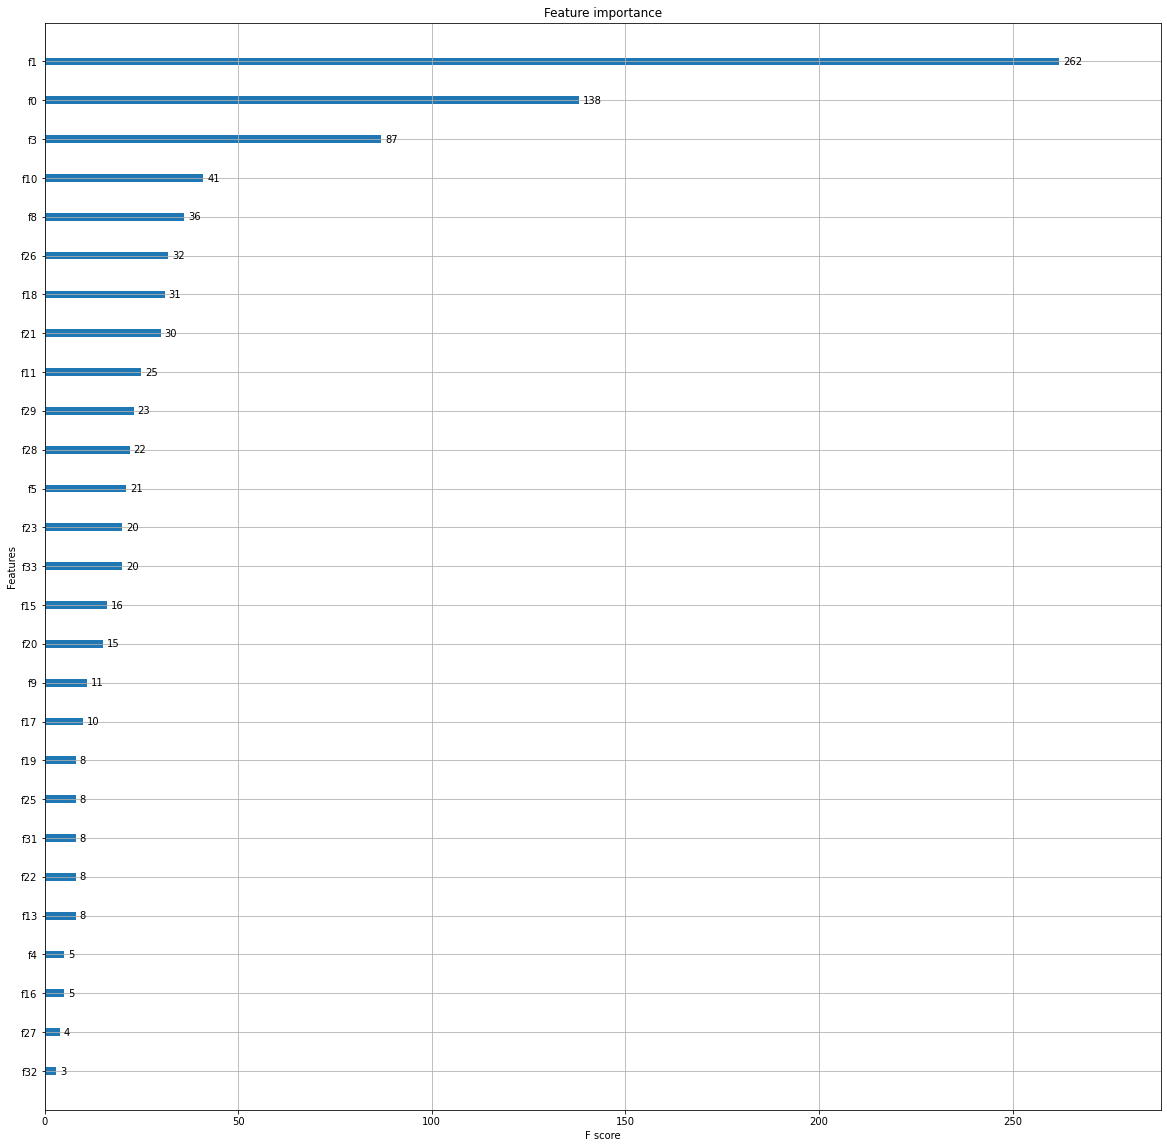

In [184]:
xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [20, 20]

# For MLFLOW

In [195]:
# pip install ipython nbconvert

Note: you may need to restart the kernel to use updated packages.


In [5]:
# !jupyter nbconvert --to script process.ipynb

In [4]:
import dvc.api
import mlflow

mlflow.start_run()
mlflow.log_param("my", "param")
mlflow.log_metric("score", 100)
mlflow.end_run()

In [9]:
path = "../data/AdSmartABdata.csv"
repo = "C/Users/Zawadi/Documents/projects/abtest-mlops"
version = "e19300fae64a8d41f40122d8f68a53"

data_url = dvc.api.get_url(path = path, repo = repo, rev = version)


CloneError: Failed to clone repo 'C/Users/Zawadi/Documents/projects/abtest-mlops' to '/tmp/tmpeqmvsje2dvc-clone'

In [193]:
mlflow.set_experiment('ABTest')

INFO: 'demo' does not exist. Creating a new experiment
